# Credit Card Fraud Detection

The purpose of this project is to find the best model for detecting fraud in credit card transactions. The dataset used is from [this Kaggle repository](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).  Given that fraud cases are rare, the dataset is highly imbalanced, requiring specific techniques such as adjusted evaluation metrics to properly address this challenge.

We will explore several models, adjusting for class imbalance where needed, and evaluate their performance on train, validation, and test sets.

## Load, explore and clean the data

In [47]:
import pandas as pd

data = pd.read_csv("creditcard.csv")

pd.options.display.max_columns = None   # This is so none of the columns are truncated when viewing the data, as in the code cell below.

In [48]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This dataset has 31 columns all-in-all, and evidently no null values. Next, we may check for duplicates.

In [50]:
data.duplicated().sum()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

The dataset had 1081 duplicate rows, which we have promptly removed. Although it was a very small percentage of the dataset, it is still good practice to perform this step as duplicate data can lead to overfitting, which would mean the model we train would struggle with real data as it has not learned a balanced view of the data distribution. Duplicate data could also lead to biased results and poor model efficiency.

Next, to view the balance in our target column, the 'Class' column.

In [51]:
data["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

The 'Class' column tells us which transactions are fraudulent and which are not (0 for legitimate, 1 for fraudulent). The results from the cell below are evidence of the imbalance in our dataset, which will affect how we train our models.

The next step is to prepare the data for model fitting. To do this, we must understand the data distribution and perform necessary transformations. Let's start with histograms.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

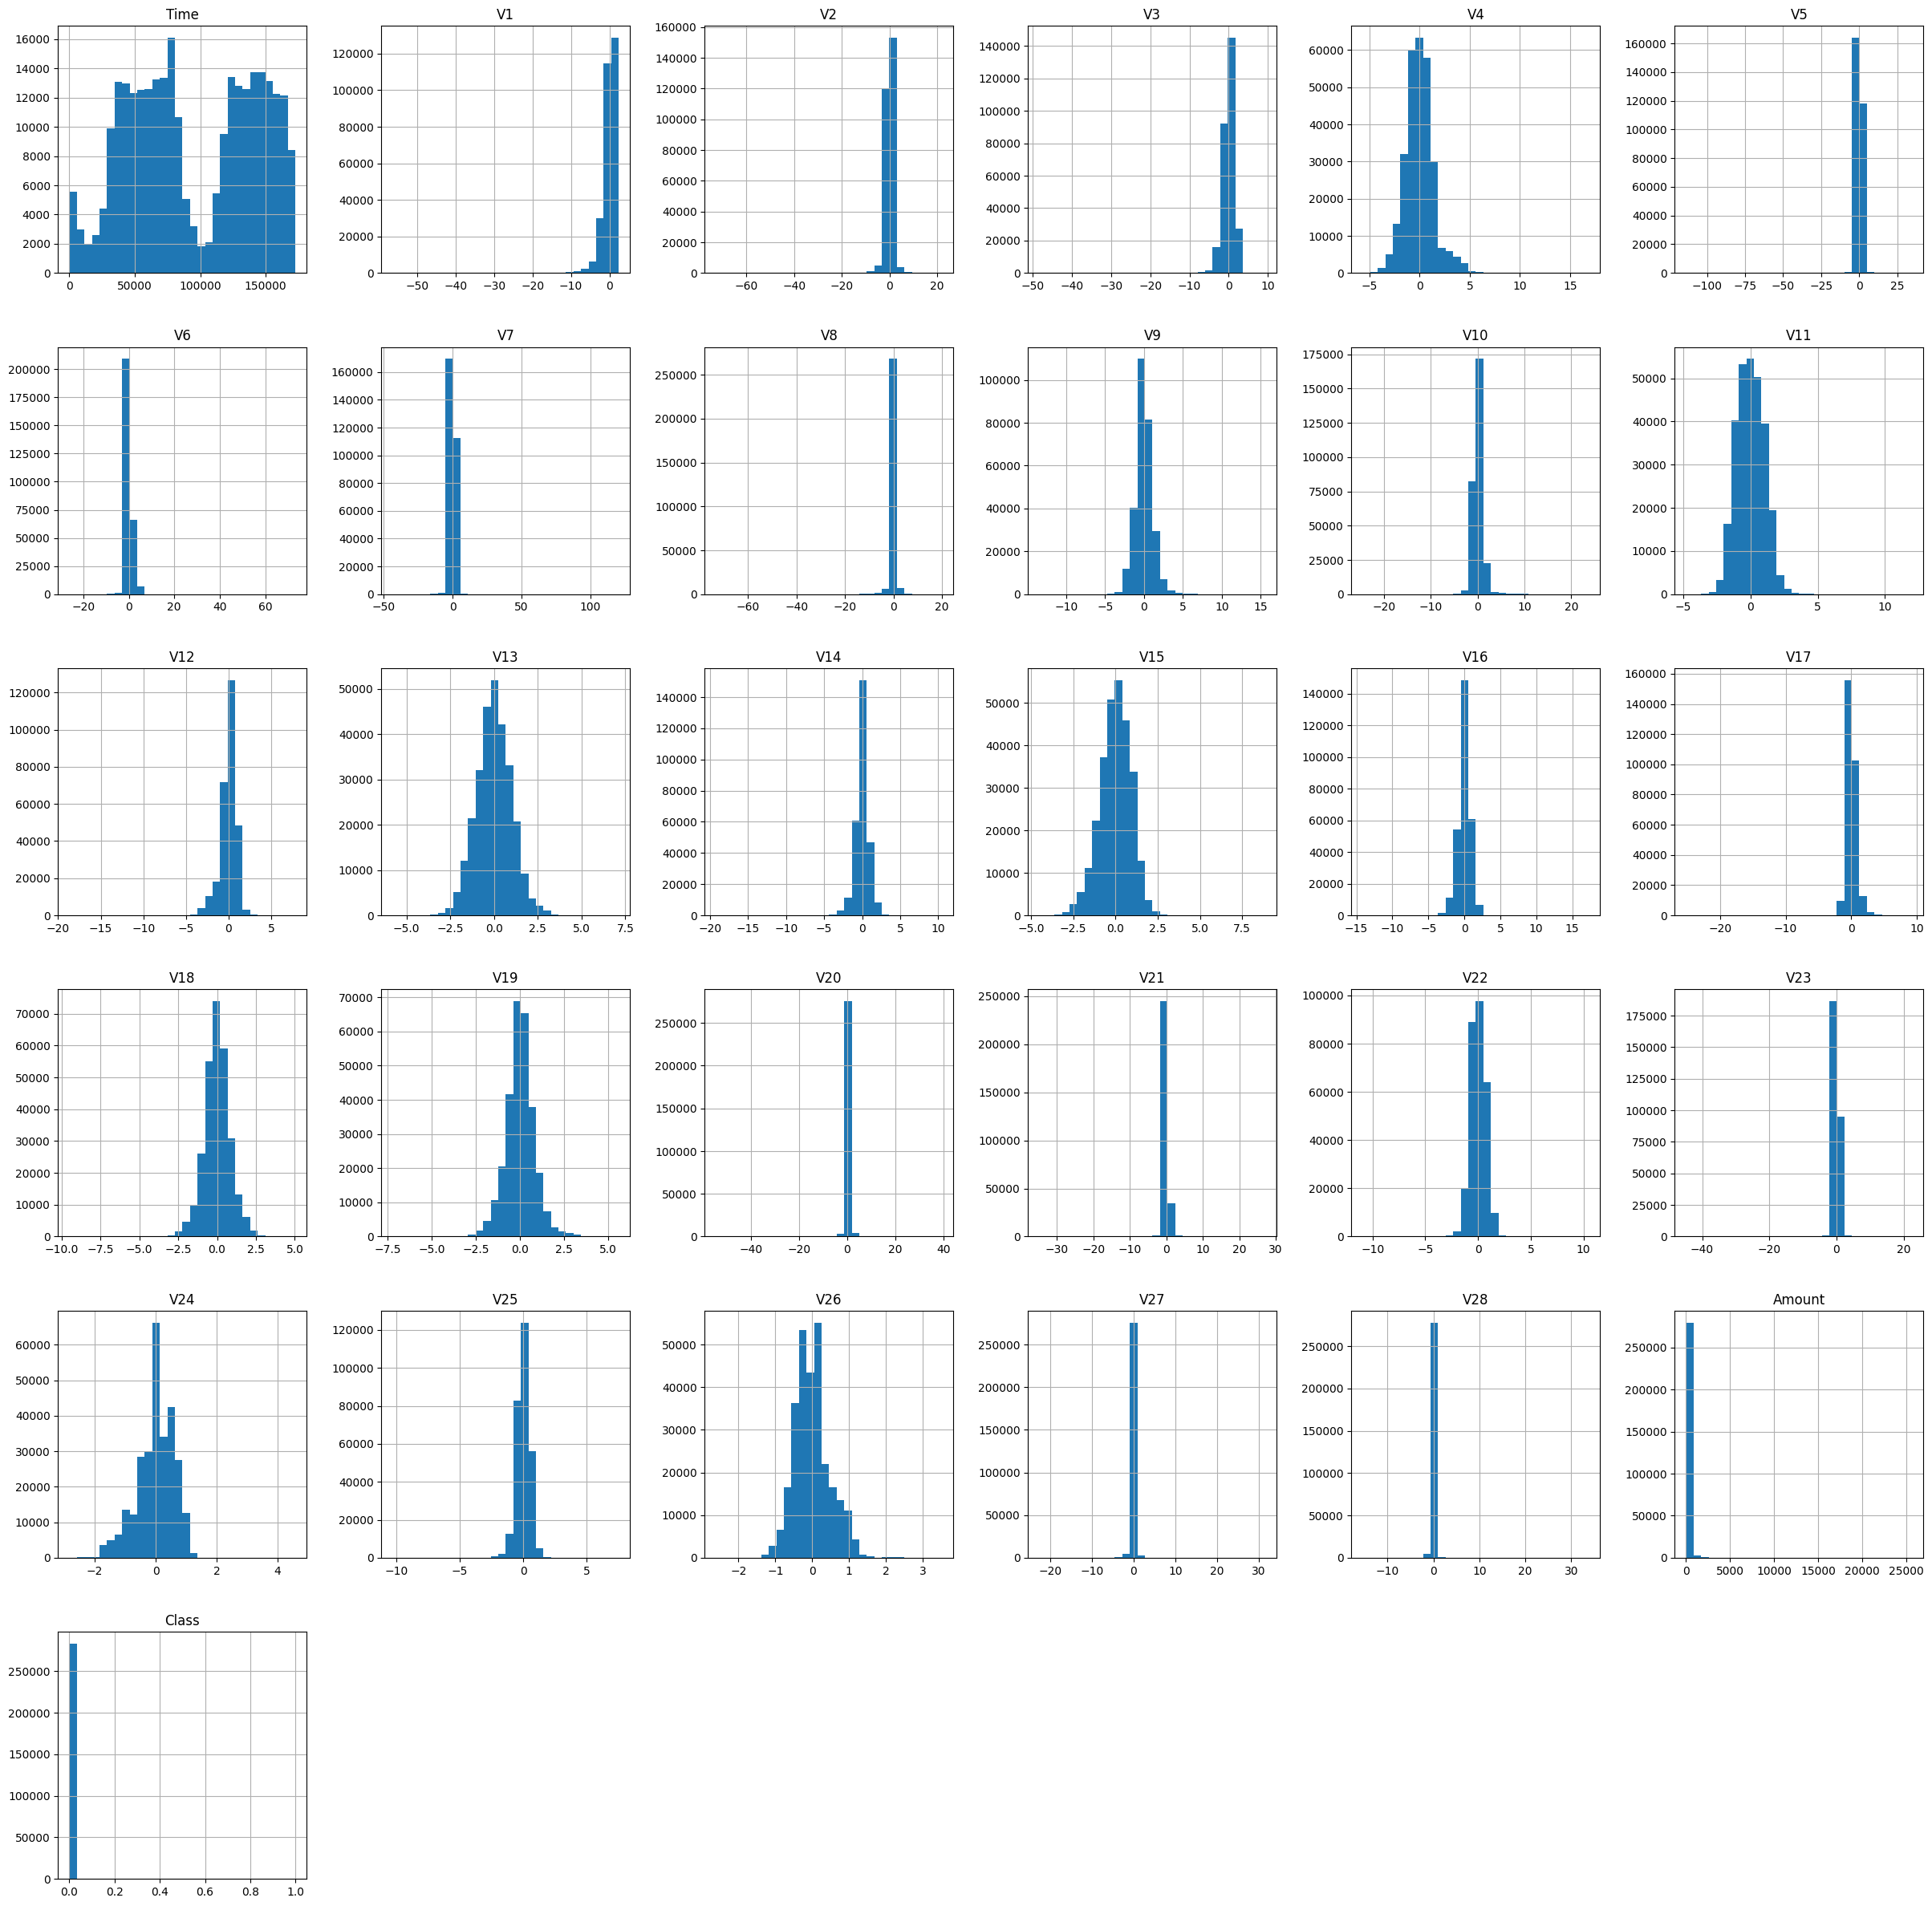

In [52]:
data.hist(bins = 30, figsize = (30,30))

Most of the columns, except for the 'Time', 'Amount' and 'Class' columns, contain data that was already transformed. The purpose of this transformation was to maintain the anonymity of the dataset, as these are real transactions over the period of two days. In a production environment, this data will probably contain some non-numerical data that will need transformation in order to perform analysis. 

The 'Amount' column contains outliers that may affect some of our models' performance. The mean stands at 88.47, while the min and max values are 0 and 25691.16, respectively. The 'Time' column contains data that spans a very wide range, which may affect some algorithms like neural networks, which are sensitive to feature magnitudes. This can be seen in the code cell below. 

That being said, we now need to transform the 'Time' and 'Amount' columns.

In [53]:
data[["Amount","Time"]].describe()

,Amount,Time
count,283726.000000,283726.000000
mean,88.472687,94811.077600
std,250.399437,47481.047891
min,0.000000,0.000000
25%,5.600000,54204.750000
50%,22.000000,84692.500000
75%,77.510000,139298.000000
max,25691.160000,172792.000000


The sensible transformation for the 'Time' values is Min-Max Scaling, which will transform the values to a range between 0 and 1. Because the values are bounded (seconds in a range of two days), this scaling method ensures that the relative distances and relative proportions are still preserved, but these values will not disproportionately influence any of our models.

The 'Amount' values have extreme outliers, so the sensible transformation is Robust Scaling, which subtracts the median and scales according to the interquartile range (IQR), reducing the effect of outliers and ensuring that the model isn’t overly influenced by extreme transaction amounts, which may otherwise distort the relationship between features.

In [54]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

data["Amount"] = RobustScaler().fit_transform(data["Amount"].values.reshape(-1, 1))
data["Time"] = MinMaxScaler().fit_transform(data["Time"].values.reshape(-1, 1))

data[["Amount","Time"]].describe()


,Amount,Time
count,283726.000000,283726.000000
mean,0.924387,0.548701
std,3.482123,0.274787
min,-0.305938,0.000000
25%,-0.228063,0.313699
50%,0.000000,0.490141
75%,0.771937,0.806160
max,356.962314,1.000000


The transformations have been completed, and now we can see that all of the variables we will be training our models on are appropriately transformed.

In [55]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.295230,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038798,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.638020,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.166875,0


At this time, it is important that we see whether any of the features in our data have any correlation that may lead to overfitting. We will use a heat map for this.

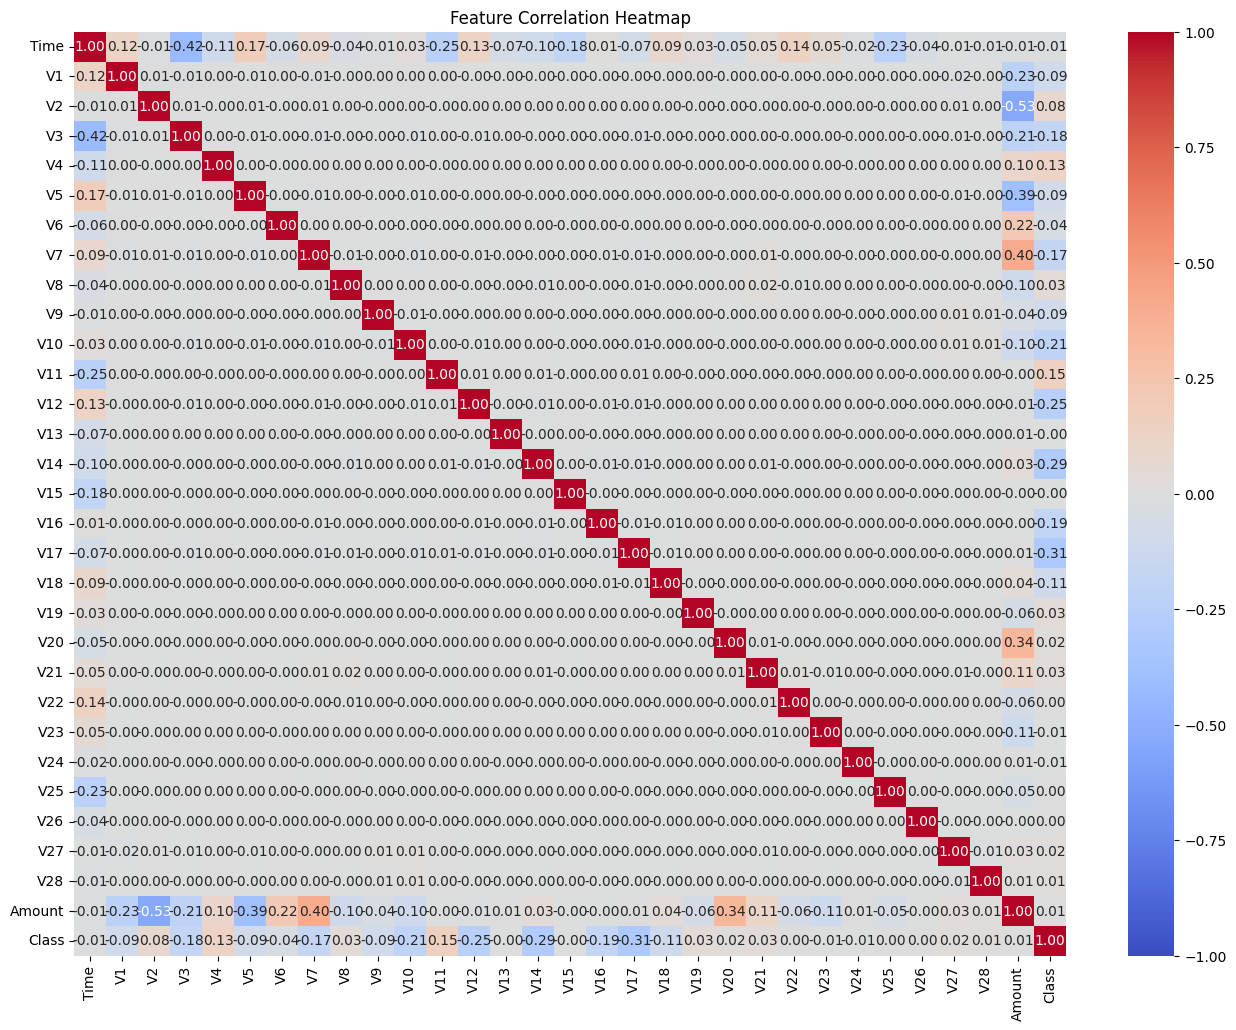

In [56]:
import seaborn as sns

correlation = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

None of the features seem to have any correlation that raises any concern. Next step, splitting our dataset into train, test and validation sets. I have settled on a 70:15:15 split. I'll first shuffle the data to ensure that the data distribution across the new dataframes is 'fair'.

In [57]:
# Shuffling the data
data = data.sample(frac=1, random_state=42)

# Calculating split sizes
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))

# Splitting the data
train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

# Display class distribution with percentage values
def display_class_distribution(data_split, split_name):
    class_counts = data_split["Class"].value_counts()
    class_percentages = data_split["Class"].value_counts(normalize=True) * 100
    print(f"{split_name} set class distribution:")
    print("Counts:\n", class_counts)
    print("Percentages:\n", class_percentages.round(2), "\n")

display_class_distribution(train_data, "Training")
display_class_distribution(val_data, "Validation")
display_class_distribution(test_data, "Test")


Training set class distribution:
Counts:
 Class
0    198279
1       329
Name: count, dtype: int64
Percentages:
 Class
0    99.83
1     0.17
Name: proportion, dtype: float64 

Validation set class distribution:
Counts:
 Class
0    42493
1       65
Name: count, dtype: int64
Percentages:
 Class
0    99.85
1     0.15
Name: proportion, dtype: float64 

Test set class distribution:
Counts:
 Class
0    42481
1       79
Name: count, dtype: int64
Percentages:
 Class
0    99.81
1     0.19
Name: proportion, dtype: float64 



Ideally, the proportions should be proportionate to reflect the distribution in the original dataset, but the differences in proportion here are so small, they are negligible.

Next step is to convert the train, validation and test dataframes into NumPy arrays so we can separate the variables and target feature ('Class').

In [16]:
train_np, val_np, test_np = train_data.to_numpy(), val_data.to_numpy(), test_data.to_numpy()

print("Train shape:", train_np.shape)
print("Validation shape:", val_np.shape)
print("Test shape:", test_np.shape)

Train shape: (198608, 31)
Validation shape: (42558, 31)
Test shape: (42560, 31)


Next step is to separate the variables and target column.

In [17]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (198608, 30)
y_train shape: (198608,)
x_val shape: (42558, 30)
y_val shape: (42558,)
x_test shape: (42560, 30)
y_test shape: (42560,)


The next step is now to select a model to train and complete our project. The most important thing now is to settle on the correct models to focus on, 

## Model Comparison and Recommendations

Some useful metrics to consider for evaluation include;

1. The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) score, which provides a single value summarizing a model’s capability to distinguish between fraud and non-fraud classes across different thresholds. The higher the AUC-ROC score, the stronger the performance in identifying fraudulent cases with minimal false positives, which is crucial for effective deployment.

2. The Precision and Recall scores, which provide a more comprehensive evaluation of a model's performance, providing insights into how well it identifies fraudulent cases while minimizing false positives and false negatives. The higher the Precision and Recall scores for class 1, the stronger the performance in identifying fraudulent cases.

3. The F1 score, which is a harmonic mean of Precision and Recall, providing a balanced evaluation of a model's performance.

4. The Confusion Matrix, which will give us a better idealization of the model's actual performances on datasets. 

To do this, we will have a function that will provide us values for these metrics for each model:

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    # Fit the model on training data
    model.fit(x_train, y_train)
    
    # Predict on validation data
    val_predictions = model.predict(x_val)
    val_probabilities = model.predict_proba(x_val)[:, 1]  # Probability for positive class

    # Validation Set Evaluation
    print(f"\nModel: {model.__class__.__name__} - Validation Set Evaluation")
    print("Classification Report:\n", classification_report(y_val, val_predictions))
    print("AUC-ROC Score:", roc_auc_score(y_val, val_probabilities))

    # Confusion Matrix for validation set
    cm_val = confusion_matrix(y_val, val_predictions)

    # Plot the confusion matrix as a heatmap for validation set
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Validation Set Confusion Matrix')
    plt.show()

    # Predict on test data
    test_predictions = model.predict(x_test)
    test_probabilities = model.predict_proba(x_test)[:, 1]

    # Test Set Evaluation
    print(f"\nModel: {model.__class__.__name__} - Test Set Evaluation")
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    print("AUC-ROC Score:", roc_auc_score(y_test, test_probabilities))
    
    # Confusion Matrix for test set
    cm_test = confusion_matrix(y_test, test_predictions)

    # Plot the confusion matrix as a heatmap for test set
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Test Set Confusion Matrix')
    plt.show()


Tree-based models, especially ensemble techniques like Random Forests and Gradient Boosting, are often more effective with imbalanced data than many other models. The paper [“A Comparative Study of Class Imbalance in Imbalanced Data”]([https://arxiv.org/abs/1901.01379) by Enlu Lin, Qiong Chen, Xiaoming Qi [2019] illustrates how tree-based ensembles outperform several other classifiers when managing highly imbalanced datasets due to their adaptability and the ability to handle complex, non-linear relationships without needing to scale features. These models demonstrate flexibility in handling skewed class distributions., and have an iterative and adaptive structure, which can prioritize difficult-to-classify instances (often from the minority class)

Because of this, I am inclined to try out these such models first. I will start with the Gradient Boosting Model

### Gradient-Boosting Classifier


Model: GradientBoostingClassifier - Validation Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42503
         1.0       0.62      0.33      0.43        55

    accuracy                           1.00     42558
   macro avg       0.81      0.66      0.71     42558
weighted avg       1.00      1.00      1.00     42558

AUC-ROC Score: 0.6361694254737099


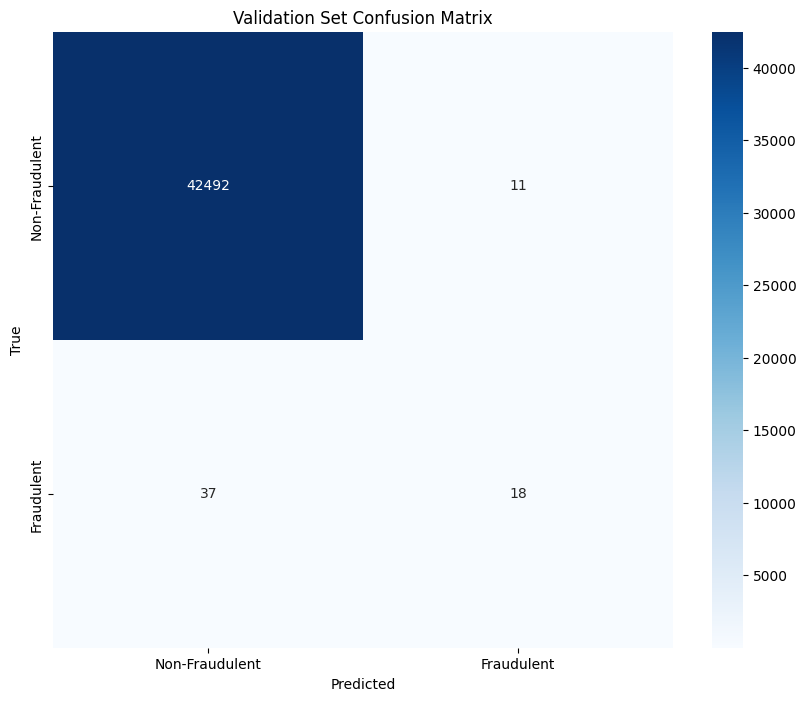


Model: GradientBoostingClassifier - Test Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42508
         1.0       0.71      0.29      0.41        52

    accuracy                           1.00     42560
   macro avg       0.86      0.64      0.71     42560
weighted avg       1.00      1.00      1.00     42560

AUC-ROC Score: 0.567227616882976


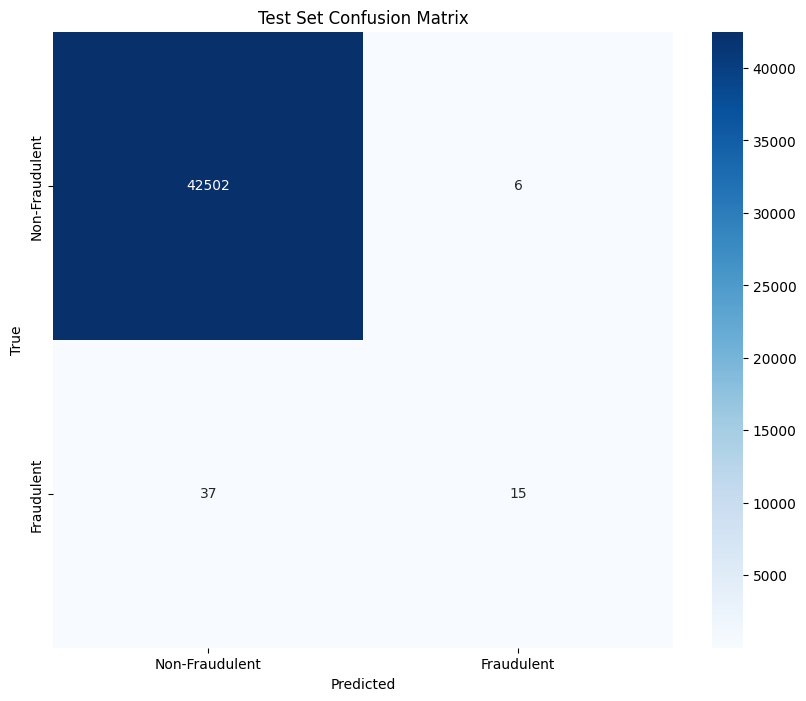

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm, x_train, y_train, x_val, y_val, x_test, y_test)

This model performs rather poorly, given the implications of the confusion matrix. It lets slip through more than twice the number of fraudulent transactions as it does legitimate transactions when tested with both the test data and validation data. Even more damning is the AUC-ROC score, which, at 0.57, suggests that, overall, this model is not much better than guesswork. Certainly there are better models to consider.

### Extreme Gradient Boost Classifier


Model: XGBClassifier - Validation Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42503
         1.0       0.89      0.75      0.81        55

    accuracy                           1.00     42558
   macro avg       0.95      0.87      0.91     42558
weighted avg       1.00      1.00      1.00     42558

AUC-ROC Score: 0.9806618998017252


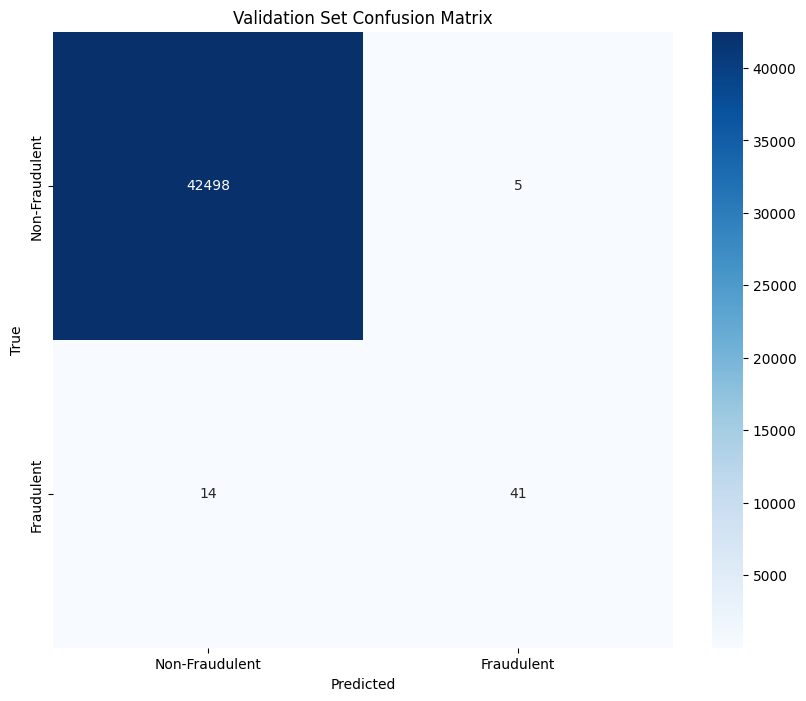


Model: XGBClassifier - Test Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42508
         1.0       0.91      0.75      0.82        52

    accuracy                           1.00     42560
   macro avg       0.95      0.87      0.91     42560
weighted avg       1.00      1.00      1.00     42560

AUC-ROC Score: 0.9769647432881412


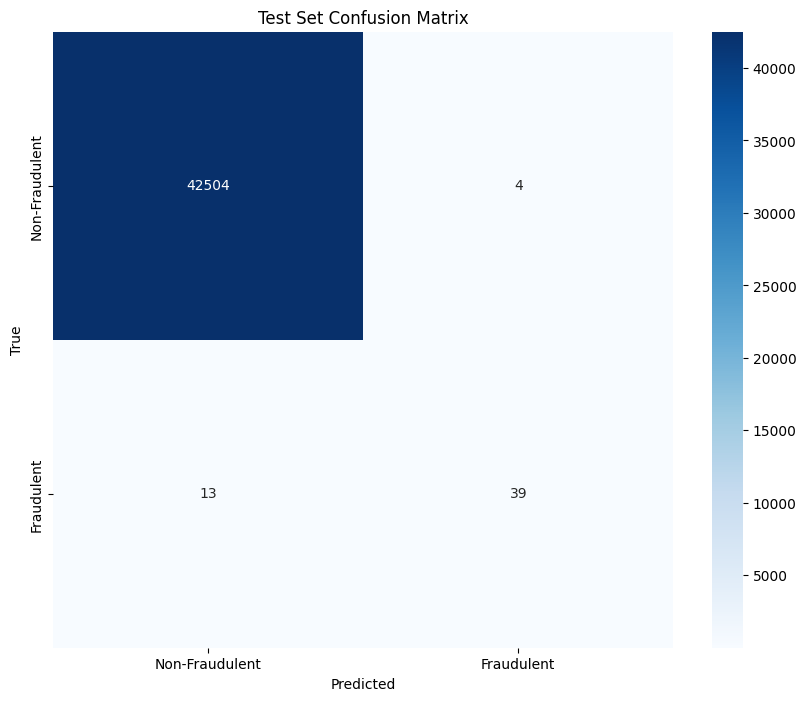

In [71]:
from xgboost import XGBClassifier

# Set scale_pos_weight based on the class imbalance ratio
scale_pos_weight = len(y_train) // sum(y_train == 1)  # This calculates the imbalance ratio

# Instantiate the model with the appropriate parameters
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Evaluate the model
evaluate_model(xgb, x_train, y_train, x_val, y_val, x_test, y_test)

This model performs much better than the Gradient Boosting Model previously tested. For the minority class (fraudulent transactions), the XGBClassifier model shows:

- Precision: 0.91 – When the model predicts a transaction as fraudulent, it is correct 91% of the time.
- Recall: 0.75 – The model identifies 75% of actual fraudulent transactions, missing about 27%.
- F1-score: 0.82 – This indicates a good balance between precision and recall for the minority class, though there’s room for improvement in recall.
- AUC-ROC: 0.977 – The model performs well in distinguishing between fraudulent and non-fraudulent transactions overall.

In summary, the model is quite accurate in detecting fraudulent transactions, though it could improve in capturing more of them (increasing recall). At only 0.75, this score suggests that the model would fail 25% of the time at identifying fraudulent transactions.

### Categorical Boost Classifier


Model: CatBoostClassifier - Validation Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42503
         1.0       0.95      0.76      0.85        55

    accuracy                           1.00     42558
   macro avg       0.98      0.88      0.92     42558
weighted avg       1.00      1.00      1.00     42558

AUC-ROC Score: 0.9902659277526934


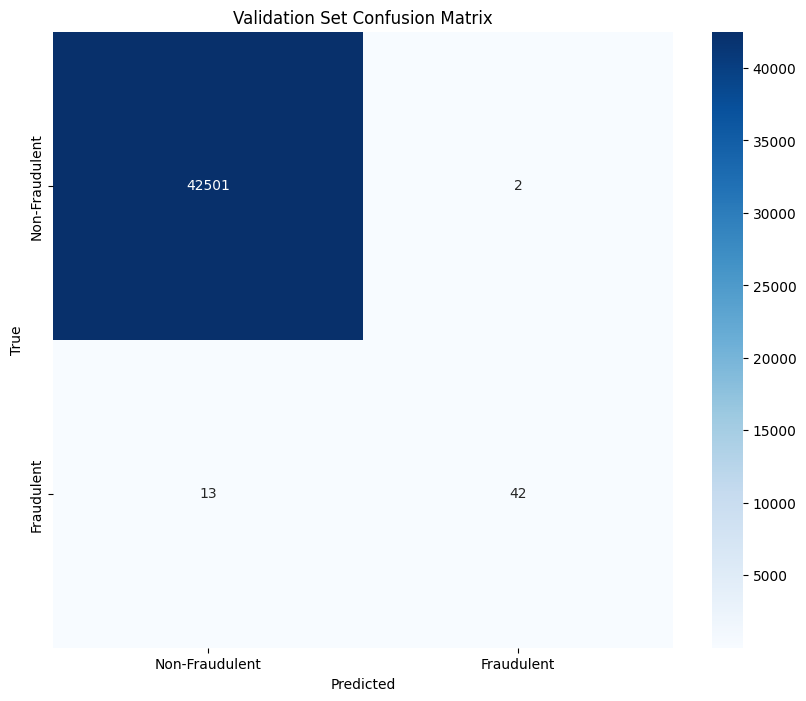


Model: CatBoostClassifier - Test Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42508
         1.0       0.81      0.73      0.77        52

    accuracy                           1.00     42560
   macro avg       0.90      0.87      0.88     42560
weighted avg       1.00      1.00      1.00     42560

AUC-ROC Score: 0.9530744439055816


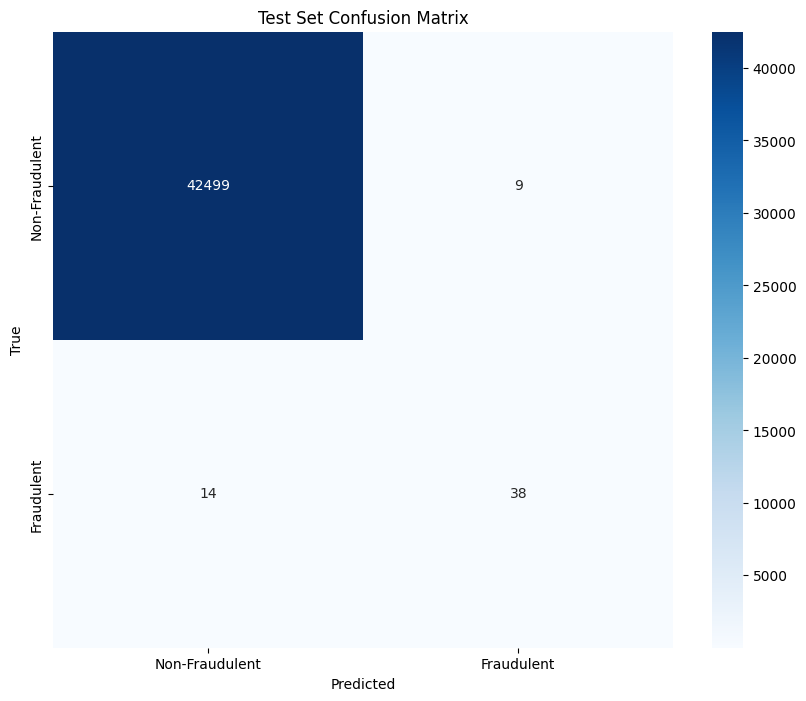

In [61]:
# 4. CatBoost
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(class_weights=[1, 99], random_state=42, verbose=0)
evaluate_model(catboost, x_train, y_train, x_val, y_val, x_test, y_test)

For the minority class (fraudulent transactions) with the CatBoostClassifier model:

- Precision: 0.81 – When predicting a transaction as fraudulent, the model is correct 81% of the time.
- Recall: 0.73 – The model identifies 73% of actual fraudulent transactions, missing around 27%.
- F1-score: 0.77 – This indicates a reasonably balanced performance between precision and recall for fraud cases.
- AUC-ROC: 0.953 – While strong, this score is slightly lower than that of other models, indicating somewhat lower effectiveness in distinguishing fraud from non-fraud.

The CatBoostClassifier performs well to identify fraudulent transactions, with a solid precision-recall balance, though it may not separate classes as effectively as the XGBClassifier and LGBMClassifier.

### Extra Trees Classifier


Model: ExtraTreesClassifier - Validation Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42503
         1.0       1.00      0.65      0.79        55

    accuracy                           1.00     42558
   macro avg       1.00      0.83      0.90     42558
weighted avg       1.00      1.00      1.00     42558

AUC-ROC Score: 0.9437205502071512


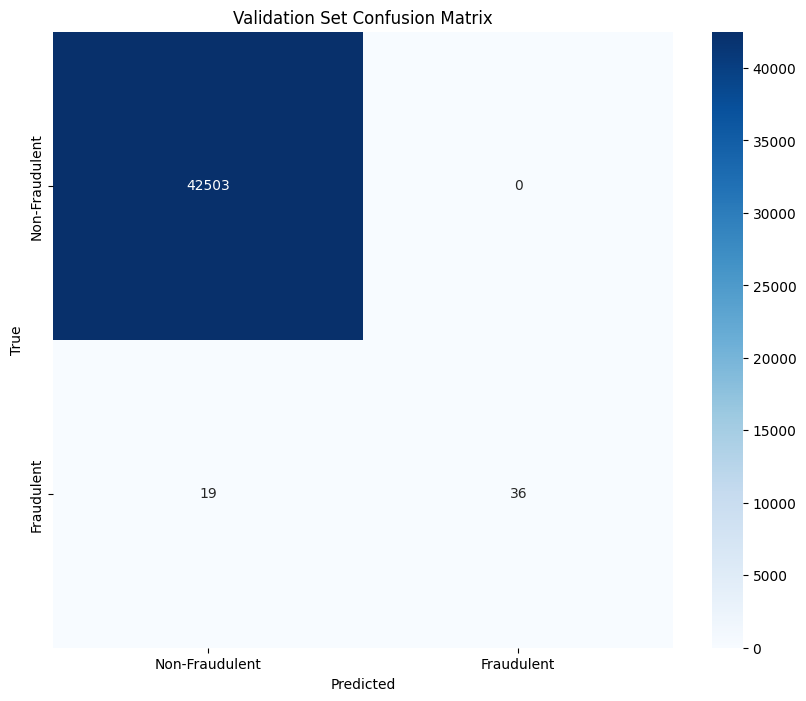


Model: ExtraTreesClassifier - Test Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42508
         1.0       1.00      0.63      0.78        52

    accuracy                           1.00     42560
   macro avg       1.00      0.82      0.89     42560
weighted avg       1.00      1.00      1.00     42560

AUC-ROC Score: 0.9299649930148896


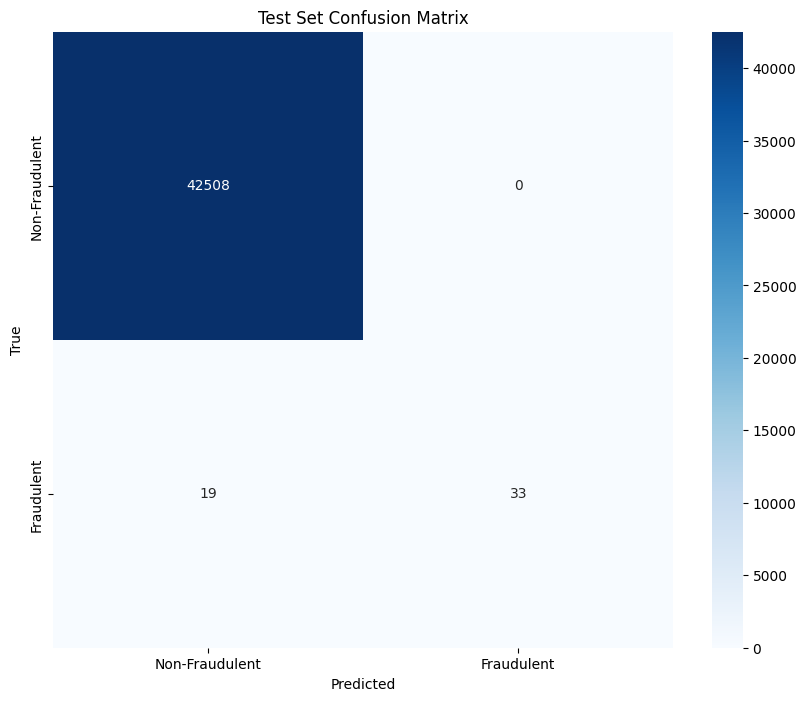

In [62]:
# 5. Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(class_weight='balanced', random_state=42)
evaluate_model(etc, x_train, y_train, x_val, y_val, x_test, y_test)

For the minority class (fraudulent transactions) with the ExtraTreesClassifier model:

- Precision: 1.00 – All instances predicted as fraudulent by the model are indeed fraudulent, indicating no false positives.
- Recall: 0.63 – The model identifies 63% of actual fraudulent transactions, meaning it misses 37% of them.
- F1-score: 0.78 – This reflects a good balance, though recall could be improved to detect more fraud cases.
- AUC-ROC: 0.930 – This score is slightly lower than other models, showing moderate effectiveness in distinguishing between fraudulent and non-fraudulent transactions.

In summary, while the ExtraTreesClassifier is precise in identifying fraudulent transactions, its lower recall and AUC-ROC suggest it could miss some fraud cases, which may limit its effectiveness in capturing all instances of fraud.

### Random Forest Classifier


Model: RandomForestClassifier - Validation Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42503
         1.0       1.00      0.65      0.79        55

    accuracy                           1.00     42558
   macro avg       1.00      0.83      0.90     42558
weighted avg       1.00      1.00      1.00     42558

AUC-ROC Score: 0.9710707051694746


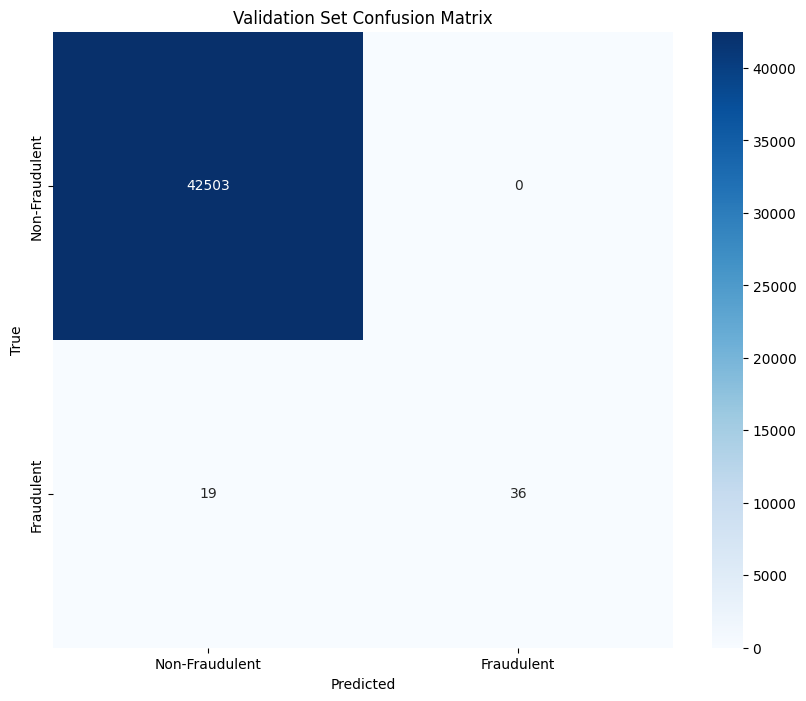


Model: RandomForestClassifier - Test Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42508
         1.0       1.00      0.62      0.76        52

    accuracy                           1.00     42560
   macro avg       1.00      0.81      0.88     42560
weighted avg       1.00      1.00      1.00     42560

AUC-ROC Score: 0.9305370572779061


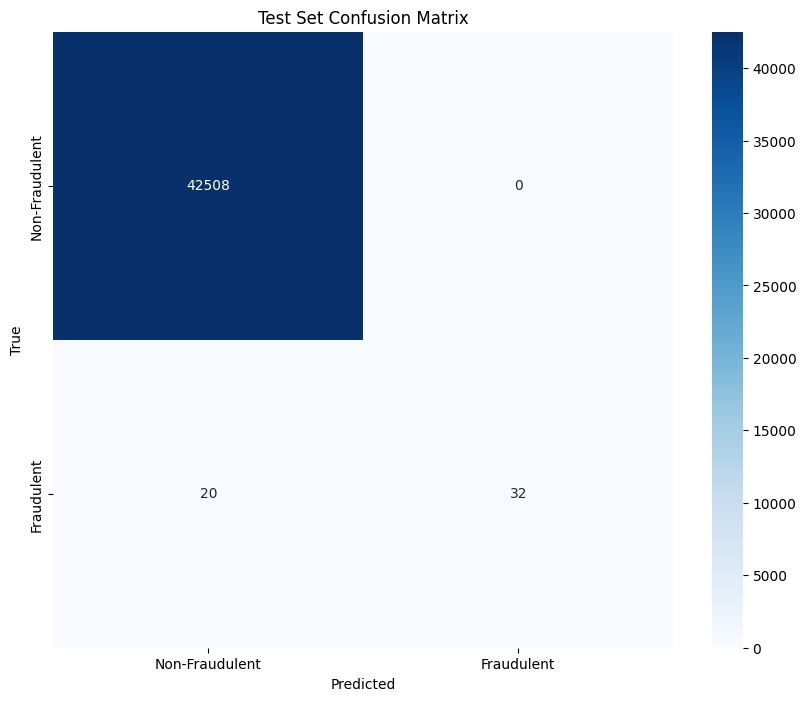

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
evaluate_model(rf, x_train, y_train, x_val, y_val, x_test, y_test)

For the minority class (fraudulent transactions) with the RandomForestClassifier model:

- Precision: 1.00 – The model perfectly identifies instances it predicts as fraudulent, with no false positives.
- Recall: 0.62 – It captures 62% of actual fraudulent transactions, missing 38%.
- F1-score: 0.76 – This reflects a solid balance between precision and recall, although recall is lower than ideal.
- AUC-ROC: 0.931 – This score suggests moderate effectiveness in distinguishing between fraudulent and non-fraudulent transactions, similar to the ExtraTreesClassifier.

In summary, the RandomForestClassifier is highly precise but has lower recall, meaning it accurately identifies flagged fraud cases but misses some. This may impact its utility if capturing more fraudulent cases is essential.

### Logistic Regression 

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: LogisticRegression - Validation Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     42503
         1.0       0.07      0.91      0.13        55

    accuracy                           0.98     42558
   macro avg       0.53      0.95      0.56     42558
weighted avg       1.00      0.98      0.99     42558

AUC-ROC Score: 0.9871991923564754


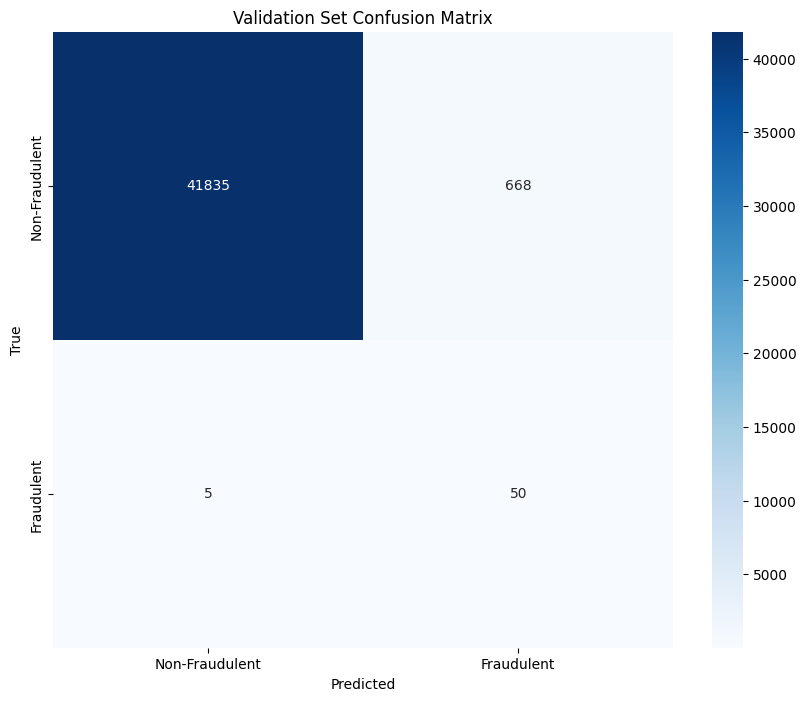


Model: LogisticRegression - Test Set Evaluation
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     42508
         1.0       0.12      0.81      0.22        52

    accuracy                           0.99     42560
   macro avg       0.56      0.90      0.61     42560
weighted avg       1.00      0.99      1.00     42560

AUC-ROC Score: 0.979461332165529


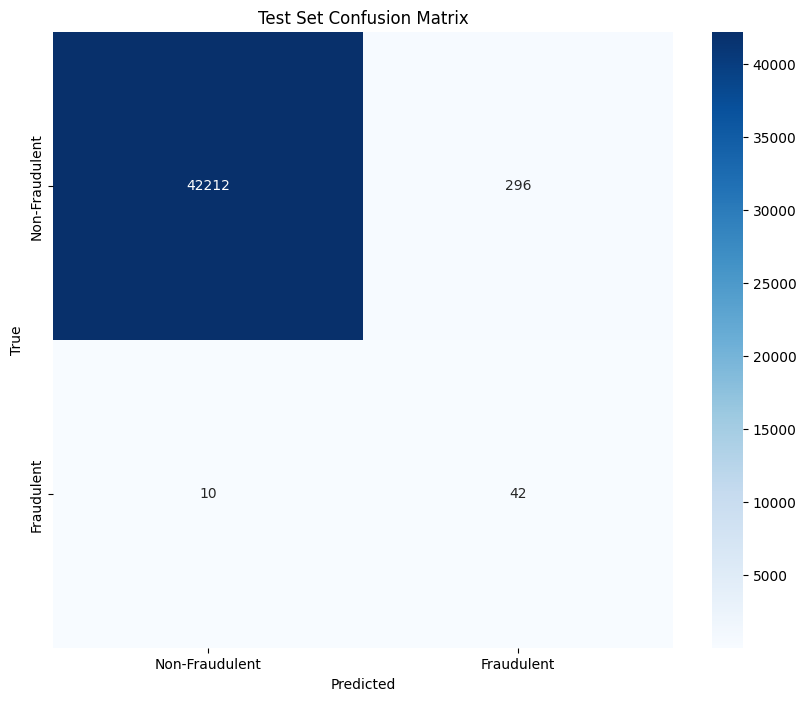

In [64]:
# Logistic Regression with Balanced Class Weights
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
evaluate_model(lr, x_train, y_train, x_val, y_val, x_test, y_test)

For the minority class (fraudulent transactions) with the Logistic Regression model:

- Precision: 0.12 – Only 12% of transactions predicted as fraudulent are actually fraud, meaning there are many false positives.
- Recall: 0.81 – The model successfully captures 81% of actual fraudulent transactions, which is relatively high.
- F1-score: 0.22 – This low F1-score indicates an imbalance, as the model's high recall is offset by low precision.
- AUC-ROC: 0.979 – The model is generally good at distinguishing between classes, although the precision issue limits practical effectiveness for fraud detection.

In summary, Logistic Regression has strong recall for fraud detection, identifying most fraud cases, but its very low precision means it flags many non-fraudulent transactions as fraudulent. This may lead to a high rate of false alarms, making it less practical without further tuning.

### Model Performance Summary
| Model               | Test AUC-ROC | Precision | Recall | F1-Score |
|---------------------|--------------|-----------|--------|----------|
| Logistic Regression | 0.9795       | 0.12      | 0.81   | 0.22     |
| Random Forest       | 0.9305       | 1.00      | 0.62   | 0.76     |
| Extra Trees         | 0.9300       | 1.00      | 0.63   | 0.78     |
| CatBoost            | 0.9531       | 0.81      | 0.73   | 0.77     |
| XGBClassifier       | 0.9712       | 0.91      | 0.75   | 0.81     |


### Recommendations
Based on the performance metrics provided, XGBClassifier seems to be the best option, offering the highest F1-score, and making it the most balanced and accurate model for detecting fraudulent transactions. The model's strong performance, especially in terms of its ability to discriminate between the minority class (fraudulent transactions) and the majority class (non-fraudulent transactions), suggests that it is well-suited for the problem at hand. Its high precision (91%) means that the number of false positives is minimal, which is important in fraud detection to avoid unnecessary intervention or false alarms. The recall of 75% indicates that while the model is effective at identifying fraudulent transactions, there is still room for improvement in capturing all instances of fraud.

XGBClassifier is an ensemble model that combines the strengths of boosting and decision trees, which helps it handle complex, non-linear relationships and large datasets effectively. Additionally, it is robust to outliers and can be fine-tuned for better performance using hyperparameter optimization. This makes it adaptable to varying data distributions and business needs, such as fraud detection in financial transactions, which can be highly dynamic.

Improving the Model
While XGBClassifier performs well, several strategies can be employed to improve its effectiveness in fraud detection. First, addressing class imbalance is crucial—fraudulent transactions often constitute a small percentage of the total data. Techniques like SMOTE (Synthetic Minority Over-sampling Technique), under-sampling the majority class, or adjusting the class weights in the model can help the classifier pay more attention to the minority class. Additionally, hyperparameter tuning, such as adjusting the learning rate, tree depth, and other settings, can enhance the model's precision and recall balance.

Compliance with Regulations
In the context of internal and external regulations, particularly in industries like banking or finance, it is essential to ensure that the model’s decisions are transparent and interpretable. XGBClassifier is a black-box model, but its decisions can be interpreted using techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations), which can explain why a specific transaction was flagged as fraudulent. This transparency is vital for both regulatory audits and for instilling trust with stakeholders. Regulations also emphasize the need for explainability in automated decision-making processes.

In addition, periodic model monitoring and retraining will be important to ensure that the model continues to perform well as new data arrives and patterns evolve. This can help in maintaining the model’s compliance with regulatory standards, especially as fraud tactics change over time. Regular audits of the model’s performance, along with a clear explanation of how predictions are made, will help meet both internal compliance standards and external regulatory requirements.

### Conclusion
Given the need for both performance and regulatory compliance, XGBClassifier, with its ability to handle imbalanced data, adaptability to various datasets, and available tools for model interpretation, would be a strong choice. Continuous model improvement through hyperparameter tuning, data balancing, and explainability techniques will further enhance its effectiveness and ensure that it aligns with regulatory standards while optimizing fraud detection performance. I will be looking to add to this priject in the coming days by experimenting with ensemble models such as Voting Ensemble.